In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040236.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2        3         4         5        6  \
0  1.525904  1.626588  1.733138  1.84262  1.953079  2.058651  2.15738   

          7         8         9  ...      4192      4193      4194      4195  \
0  2.249267  2.335288  2.415445  ...  1.128055  1.116325  1.103617  1.090909   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.078201  1.069404  1.058651  1.046921     93.423299       42.21071  

[1 rows x 4202 columns]
[93.42329921]  /  [42.21070956]
          0         1         2        3         4         5        6  \
0  1.525904  1.626588  1.733138  1.84262  1.953079  2.058651  2.15738   

          7         8         9  ...      4190      4191      4192      4193  \
0  2.249267  2.335288  2.415445  ...  1.148583  1.138807  1.128055  1.116325   

       4194      4195      4196      4197      4198      4199  
0  1.103617  1.090909  1.078201  1.069404  1.058651  1.046921  

[1 rows x 4200 columns]


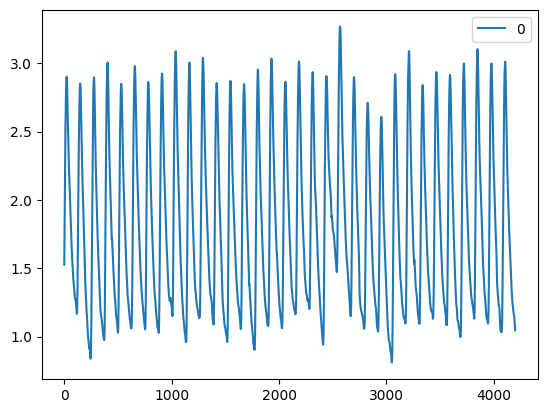

In [215]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [216]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

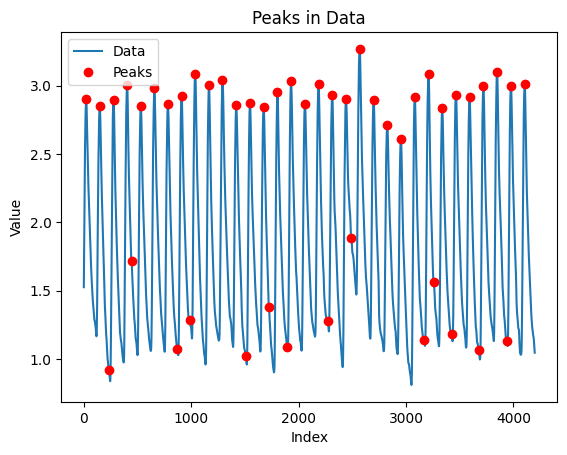

{'indices': array([  22,  148,  235,  277,  403,  444,  530,  657,  782,  872,  911,
        987, 1037, 1165, 1291, 1419, 1507, 1548, 1675, 1724, 1803, 1894,
       1929, 2059, 2186, 2271, 2313, 2441, 2492, 2569, 2698, 2826, 2952,
       3082, 3164, 3210, 3260, 3337, 3426, 3465, 3592, 3677, 3721, 3847,
       3938, 3978, 4106]), 'values': array([2.90029326, 2.8514174 , 0.9198436 , 2.89540567, 3.00488759,
       1.71945259, 2.84848485, 2.97849462, 2.86217009, 1.07135875,
       2.92277615, 1.28250244, 3.08602151, 3.00488759, 3.03812317,
       2.85434995, 1.02541544, 2.86999022, 2.84652981, 1.38318671,
       2.95210166, 1.08895406, 3.03225806, 2.86314761, 3.01173021,
       1.27565982, 2.93352884, 2.90518084, 1.88367546, 3.26783969,
       2.8973607 , 2.70967742, 2.60703812, 2.9198436 , 1.13880743,
       3.08797654, 1.56304985, 2.83870968, 1.18572825, 2.93450635,
       2.91397849, 1.06940371, 2.99706745, 3.10166178, 1.12903226,
       2.99706745, 3.01075269])}
    Index     Value
0  

In [217]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [219]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.900293255131965, 2.8514173998044967, None, 2.895405669599218, 3.004887585532747, None, 2.8484848484848486, 2.978494623655914, 2.86217008797654, None, 2.9227761485826003, None, 3.086021505376344, 3.004887585532747, 3.038123167155425, 2.854349951124145, None, 2.8699902248289346, 2.84652981427175, None, 2.952101661779081, None, 3.032258064516129, 2.863147605083089, 3.0117302052785924, None, 2.9335288367546437, 2.905180840664712, None, 3.267839687194526, 2.897360703812317, 2.7096774193548385, 2.6070381231671558, 2.919843597262952, None, 3.0879765395894427, None, 2.838709677419355, None, 2.9345063538611926, 2.913978494623656, None, 2.997067448680352, 3.101661779081134, None, 2.997067448680352, 3.010752688172043]
[None, None, 0.919843597262952, None, None, 1.7194525904203324, None, None, None, 1.0713587487781036, None, 1.2825024437927663, None, None, None, None, 1.0254154447702837, None, None, 1.383186705767351, None, 1.088954056695992, None, None, None, 1.2756598240469208, None, None, 1.

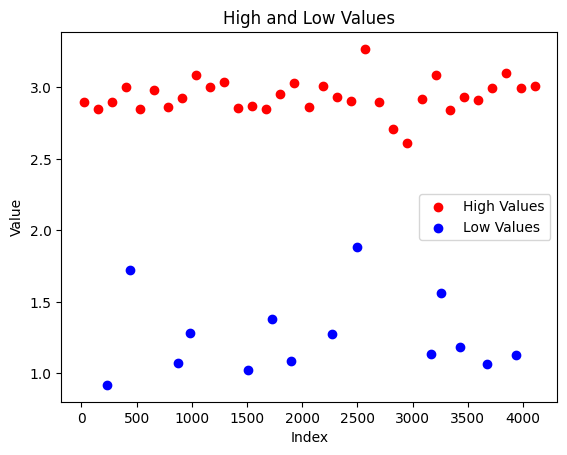

In [220]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [221]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.9377351224858557
Average Low Value: 1.2668621700879765


In [222]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [223]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.9377351224858557 : 0.7344337806214639
Scaled value of 1.2668621700879765 : 0.31671554252199413
